In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import sklearn
from pandas.plotting import scatter_matrix

### Step 1: Split data into training & testing sets:

In [46]:
cardf = pd.read_csv('car-data.csv')
cardf.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
cardf.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [49]:
cardf.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

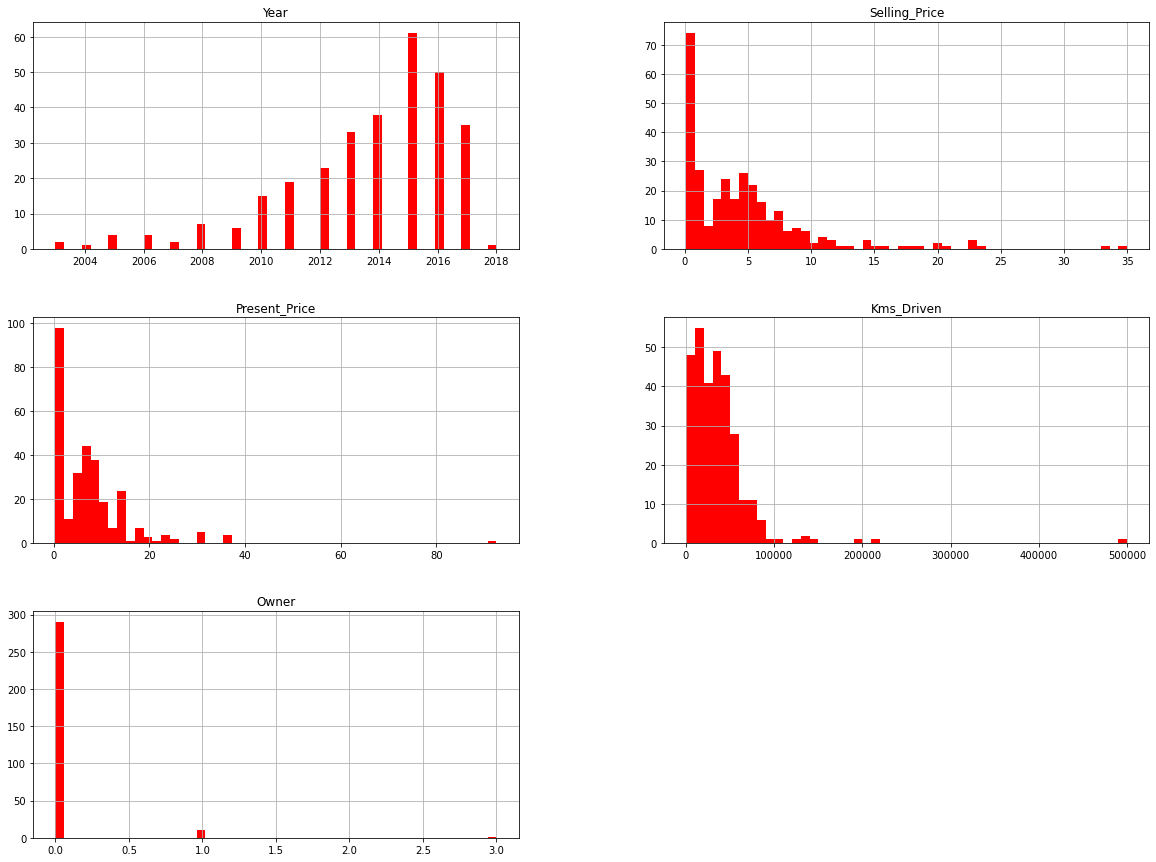

In [50]:
cardf.hist(bins=50, figsize=(20,15), color='red')
plot.show()

<AxesSubplot:>

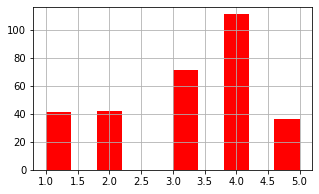

In [51]:
cardf["Year_Cat"] = pd.cut(cardf["Year"], bins=[0., 2010, 2012, 2014, 2016, np.inf], labels=[1,2,3,4,5])
cardf["Year_Cat"].hist(figsize=(5,3), color='red')

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

In [53]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    object  
 6   Seller_Type    301 non-null    object  
 7   Transmission   301 non-null    object  
 8   Owner          301 non-null    int64   
 9   Year_Cat       301 non-null    category
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 21.8+ KB


In [54]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(cardf, cardf["Year_Cat"]):
    strat_train_set = cardf.loc[train_index]
    strat_test_set = cardf.loc[test_index]

strat_test_set["Year_Cat"].value_counts() / len(strat_test_set)

4    0.377049
3    0.229508
2    0.147541
1    0.131148
5    0.114754
Name: Year_Cat, dtype: float64

### Step 2: Experiment with training dataset:

In [55]:
carcorr_matrix = cardf.corr()

In [56]:
carcorr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

array([[<AxesSubplot:xlabel='Selling_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Year', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>,
        <AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Year', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Present_Price'>,
        <AxesSubplot:xlabel='Owner', ylabel='Present_Price'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Present_Price', ylabel='Year'>,
        <AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Kms_Driven', ylabel='Year'>,
        <AxesSubplot:xlabel='Owner', ylabel='Year'>],
       [<AxesSubplot:xlabel='Selling_Price', ylabel=

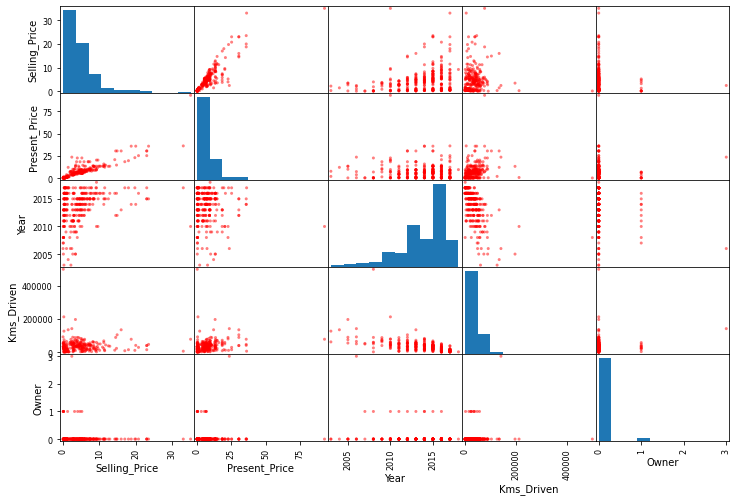

In [57]:
attributes = ["Selling_Price", "Present_Price", "Year", "Kms_Driven", "Owner"]
scatter_matrix(cardf[attributes], figsize=(12,8), color='red')

In [58]:
currentYear = max(cardf["Year"]) + 1
cardf["kms_per_year"] = cardf["Kms_Driven"] / (currentYear - cardf["Year"])
carcorr_matrix = cardf.corr()
carcorr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
kms_per_year     0.261841
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [59]:
car_inputs = strat_train_set.drop("Selling_Price", axis=1)
car_labels = strat_train_set["Selling_Price"].copy()

In [60]:
from sklearn.preprocessing import OneHotEncoder

year_cat = cardf[["Year_Cat"]]
car_encoder = OneHotEncoder()
car_1hot = car_encoder.fit_transform(year_cat)
car_1hot

<301x5 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

In [61]:
car_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

### Step 3: Transformation Pipelines

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
cardf = car_data = strat_train_set.copy().drop("Selling_Price", axis=1).drop("Car_Name", axis=1)
cardf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 20
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           240 non-null    int64   
 1   Present_Price  240 non-null    float64 
 2   Kms_Driven     240 non-null    int64   
 3   Fuel_Type      240 non-null    object  
 4   Seller_Type    240 non-null    object  
 5   Transmission   240 non-null    object  
 6   Owner          240 non-null    int64   
 7   Year_Cat       240 non-null    category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 15.4+ KB


In [64]:
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__ (self, add_Kms_Per_Year = True):
        self.add_Kms_Per_Year = add_Kms_Per_Year
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.add_Kms_Per_Year:
            current_year=max(X[:,car_data.columns.get_loc("Year")]) + 1
            Kms_Per_Year = X[:,car_data.columns.get_loc("Kms_Driven")]/(current_year - X[:, car_data.columns.get_loc("Year")])
            return np.c_[X, Kms_Per_Year]
        else:
            return X

In [65]:
attr_addr = CombinedAttributesAddr(add_Kms_Per_Year=True)
car_data_extra_attribs = attr_addr.transform(cardf.values)
car_data_extra_attribs

array([[2015, 8.92, 42367, ..., 0, 4, 14122.333333333334],
       [2013, 0.57, 18000, ..., 0, 3, 3600.0],
       [2012, 9.4, 60000, ..., 0, 2, 10000.0],
       ...,
       [2016, 20.91, 12000, ..., 0, 4, 6000.0],
       [2012, 6.79, 35000, ..., 0, 2, 5833.333333333333],
       [2016, 3.95, 25000, ..., 0, 4, 12500.0]], dtype=object)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAddr()),
    ('std_scaler', StandardScaler()),
])

cardf_num = car_data.select_dtypes(include=["int64", "float64"])
cardf_num.info()
cardf_num_tr = num_pipeline.fit_transform(cardf_num)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 9 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Present_Price  240 non-null    float64
 2   Kms_Driven     240 non-null    int64  
 3   Owner          240 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 9.4 KB


In [67]:
from sklearn.compose import ColumnTransformer

num_attribs = list(cardf_num)
cat_attribs = ["Fuel_Type", "Seller_Type", "Transmission"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])



In [68]:
cars_prepared = full_pipeline.fit_transform(cardf)

In [69]:
cars_prepared

array([[ 0.47087125,  0.15133489,  0.129479  , ...,  0.        ,
         0.        ,  1.        ],
       [-0.22031591, -0.77378641, -0.4596781 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.56590949,  0.20451551,  0.5558182 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81646484,  1.4797426 , -0.60474901, ...,  0.        ,
         0.        ,  1.        ],
       [-0.56590949, -0.08465414, -0.04864388, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81646484, -0.39930617, -0.29042872, ...,  0.        ,
         0.        ,  1.        ]])

### Step 4: Regression

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, car_labels)

some_data = car_data.iloc[:5]
some_labels = car_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [8.16355805 0.16441356 6.29950337 0.84261973 5.56578467]


In [71]:
print("Labels: ", list(some_labels))

Labels:  [7.45, 0.25, 4.95, 0.6, 4.0]


In [72]:
from sklearn.metrics import mean_squared_error

cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(car_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7483034665226949

In [73]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, car_labels)

car_predictions = tree_reg.predict(cars_prepared)

tree_mse = mean_squared_error(car_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.7483034665226949

#### Cross validation: 

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, cars_prepared, car_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [1.1935783  1.26016699 1.27214222 1.36989963 1.81095394 4.31073466
 1.06525232 1.27112647 1.22189402 2.91860126]
Mean:  1.769434981565956
Standard deviation:  0.9910797206468066


In [75]:
# for linear regression

lin_scores = cross_val_score(lin_reg, cars_prepared, car_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [1.03522474 2.05435772 1.22806382 1.92426896 2.27869416 3.2932284
 1.11676399 1.43468998 2.87999394 3.2399194 ]
Mean:  2.0485205109022857
Standard deviation:  0.8169091247699675


In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, cars_prepared, car_labels, 
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)


Scores:  [0.45909547 1.13723703 0.68374012 2.27998293 1.60309929 3.51913065
 0.52875596 0.67213313 0.88051773 2.46626366]
Mean:  1.4229955956561071
Standard deviation:  0.9728338138491699


In [77]:
####
forest_reg.fit(cars_prepared, car_labels)
car_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(car_labels, car_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.7010222514894469

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'n_estimators': [2, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(cars_prepared, car_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

In [79]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=10)

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.4680003243944486 {'max_features': 2, 'n_estimators': 2}
2.6119207850736976 {'max_features': 2, 'n_estimators': 10}
2.507647688959604 {'max_features': 2, 'n_estimators': 30}
2.788922544340974 {'max_features': 4, 'n_estimators': 2}
2.4539492634323143 {'max_features': 4, 'n_estimators': 10}
2.3048572298517755 {'max_features': 4, 'n_estimators': 30}
2.827088479484385 {'max_features': 6, 'n_estimators': 2}
2.110286130875779 {'max_features': 6, 'n_estimators': 10}
2.1513722374723225 {'max_features': 6, 'n_estimators': 30}
2.334142196111168 {'max_features': 8, 'n_estimators': 2}
1.9160853223434493 {'max_features': 8, 'n_estimators': 10}
2.109137799420523 {'max_features': 8, 'n_estimators': 30}
3.185759524822927 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.4202532822000262 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.039138050927038 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.5701011239832567 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [81]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.42840020e-02, 5.68366884e-01, 3.59766818e-02, 1.51678358e-05,
       1.31192895e-02, 6.33331126e-07, 1.05635890e-01, 1.67779078e-02,
       6.32043579e-02, 8.12104223e-02, 3.70131914e-02, 2.43955722e-02])

In [82]:
extra_attribs = ["Kms_Per_Year"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5683668838030446, 'Present_Price'),
 (0.10563589012853321, 'Diesel'),
 (0.0542840020011903, 'Year'),
 (0.035976681840647194, 'Kms_Driven'),
 (0.01677790779532289, 'Petrol'),
 (0.01311928954844752, 'Kms_Per_Year'),
 (1.5167835791712675e-05, 'Owner'),
 (6.33331125794298e-07, 'CNG')]

In [83]:
car_predictions = grid_search.best_estimator_.predict(cars_prepared)
gs_mse = mean_squared_error(car_labels, car_predictions)
gs_rmse = np.sqrt(gs_mse)
gs_rmse

0.6762076172793876

### Step 5: Prediction using the test set

In [84]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Selling_Price", axis=1).drop("Car_Name", axis=1)
y_test = strat_test_set["Selling_Price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

1.1267852210719793

In [85]:
# confidencelevel 

In [86]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, 
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([0.66410347, 1.44853597])

In [87]:
result = final_model.score(X_test_prepared, y_test)
print(result)



0.9357443168942708


In [88]:
#saving the model

import joblib

filename = 'car_price_predictor.sav'
joblib.dump(final_model, filename)

['car_price_predictor.sav']